In [120]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
df = pd.read_csv('/content/drive/MyDrive/CODING/project2/combine_data_since_2000_PROCESSED_2018-04-26.csv')
df.head()

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Pfr_ID,AV,Team,Round,Pick
0,John Abraham,OLB,76,252,4.55,NaN,NaN,NaN,NaN,NaN,2000,AbraJo00,26.0,New York Jets,1.0,13.0
1,Shaun Alexander,RB,72,218,4.58,NaN,NaN,NaN,NaN,NaN,2000,AlexSh00,26.0,Seattle Seahawks,1.0,19.0
2,Darnell Alford,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,2000,AlfoDa20,0.0,Kansas City Chiefs,6.0,188.0
3,Kyle Allamon,TE,74,253,4.97,29.0,NaN,104.0,7.29,4.49,2000,NaN,0.0,NaN,NaN,NaN
4,Rashard Anderson,CB,74,206,4.55,34.0,NaN,123.0,7.18,4.15,2000,AndeRa21,6.0,Carolina Panthers,1.0,23.0


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6218 entries, 0 to 6217
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     6218 non-null   object 
 1   Pos        6218 non-null   object 
 2   Ht         6218 non-null   int64  
 3   Wt         6218 non-null   int64  
 4   Forty      6046 non-null   float64
 5   Vertical   4796 non-null   float64
 6   BenchReps  4212 non-null   float64
 7   BroadJump  4754 non-null   float64
 8   Cone       3993 non-null   float64
 9   Shuttle    4063 non-null   float64
 10  Year       6218 non-null   int64  
 11  Pfr_ID     4895 non-null   object 
 12  AV         6218 non-null   float64
 13  Team       3738 non-null   object 
 14  Round      3738 non-null   float64
 15  Pick       3738 non-null   float64
dtypes: float64(9), int64(3), object(4)
memory usage: 777.4+ KB


### Questions and anwsers about data

1) Source of data
<br>
https://www.kaggle.com/savvastj/nfl-combine-data
<br><br>
2) Brief description of data
<br>
The data is nfl combine data of how athletes performed and where they got drafted
<br><br>
3) What is the target?
<br>
the target will be the round the player got drafted
<br><br>
4) Is this a classification or regression problem?
<br>
Im actually going to try both ways and see what predicts better
<br><br>
5) How many features?
<br>
11 features after i drop some of the things that are not needed like team and pfr_id
<br><br>
6) How many rows of data.
<br>
6218
<br><br>
7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
<br>
just getting a model to perform well. Interesting cleaning process will have to really think about how to fill some values or drop.

<br>
I know says pick a data set thats missing only 10 percent but after i drop some of the columns it will be close to that

###Data Cleaning

In [124]:
#dropping unnecesarry rows
df.drop(columns=['Player','Pfr_ID','Team','Pick'],inplace=True)

In [125]:
#check for Duplicates
df.duplicated().sum()

1

In [126]:
#drop duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [127]:
#missing data going to check each time after i fix to ensure it worked
df.isna().sum()

Pos             0
Ht              0
Wt              0
Forty         171
Vertical     1421
BenchReps    2005
BroadJump    1463
Cone         2224
Shuttle      2154
Year            0
AV              0
Round        2479
dtype: int64

In [128]:
#drop missing forty times
df.dropna(subset=['Forty'],inplace=True)

In [129]:
#missing data check
df.isna().sum()

Pos             0
Ht              0
Wt              0
Forty           0
Vertical     1295
BenchReps    1913
BroadJump    1334
Cone         2078
Shuttle      2009
Year            0
AV              0
Round        2358
dtype: int64

In [130]:
#Fill in Round Undrafted players will be round 8 For classifying purposes
#First check value_counts to make sure No weird values
df['Round'].value_counts()

4.0    584
3.0    584
1.0    560
2.0    547
5.0    521
6.0    450
7.0    442
Name: Round, dtype: int64

In [131]:
df['Round'].fillna(value=8,inplace=True)

In [132]:
df['Round'].value_counts()

8.0    2358
4.0     584
3.0     584
1.0     560
2.0     547
5.0     521
6.0     450
7.0     442
Name: Round, dtype: int64

In [133]:
#missing data check
df.isna().sum()

Pos             0
Ht              0
Wt              0
Forty           0
Vertical     1295
BenchReps    1913
BroadJump    1334
Cone         2078
Shuttle      2009
Year            0
AV              0
Round           0
dtype: int64

In [134]:
df.describe()

,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,AV,Round
count,6046.00000,6046.000000,6046.000000,4751.000000,4133.000000,4712.000000,3968.000000,4037.000000,6046.000000,6046.000000,6046.000000
mean,73.79474,243.668707,4.783784,32.819406,20.958142,113.934423,7.283007,4.390647,2008.900265,5.196990,5.458981
std,2.62577,45.211492,0.305984,4.216011,6.407578,9.330584,0.423341,0.269369,5.379692,7.606366,2.539004
min,65.00000,149.000000,4.220000,17.500000,2.000000,74.000000,6.280000,3.730000,2000.000000,-4.000000,1.000000
25%,72.00000,206.000000,4.540000,30.000000,16.000000,108.000000,6.970000,4.190000,2004.000000,0.000000,3.000000
50%,74.00000,234.000000,4.700000,33.000000,21.000000,115.000000,7.190000,4.350000,2009.000000,1.000000,6.000000
75%,76.00000,281.750000,4.980000,35.500000,25.000000,121.000000,7.540000,4.560000,2014.000000,8.000000,8.000000
max,82.00000,375.000000,6.050000,46.000000,49.000000,147.000000,9.120000,5.560000,2018.000000,51.000000,8.000000


In [135]:
#going to impute the rest of the values with mean by round drafted/undrafted with a function

In [136]:
def fill_function(col):
  round = [1,2,3,4,5,6,7,8]
  for r in round:
    round_filter = df['Round'] == r
    mean = df[round_filter][col].mean()
    df.loc[round_filter,col] = df.loc[round_filter,col].fillna(value=mean)


In [137]:
fill_function('Vertical')
df.isna().sum()

Pos             0
Ht              0
Wt              0
Forty           0
Vertical        0
BenchReps    1913
BroadJump    1334
Cone         2078
Shuttle      2009
Year            0
AV              0
Round           0
dtype: int64

In [138]:
fill_function('BenchReps')
df.isna().sum()

Pos             0
Ht              0
Wt              0
Forty           0
Vertical        0
BenchReps       0
BroadJump    1334
Cone         2078
Shuttle      2009
Year            0
AV              0
Round           0
dtype: int64

In [139]:
fill_function('BroadJump')
df.isna().sum()

Pos             0
Ht              0
Wt              0
Forty           0
Vertical        0
BenchReps       0
BroadJump       0
Cone         2078
Shuttle      2009
Year            0
AV              0
Round           0
dtype: int64

In [140]:
fill_function('Cone')
df.isna().sum()

Pos             0
Ht              0
Wt              0
Forty           0
Vertical        0
BenchReps       0
BroadJump       0
Cone            0
Shuttle      2009
Year            0
AV              0
Round           0
dtype: int64

In [141]:
fill_function('Shuttle')
df.isna().sum()
#The reason i did it in seperate code block satisfying to see it fill !!!!

Pos          0
Ht           0
Wt           0
Forty        0
Vertical     0
BenchReps    0
BroadJump    0
Cone         0
Shuttle      0
Year         0
AV           0
Round        0
dtype: int64

#Value Counts for one object

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6046 entries, 0 to 6217
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pos        6046 non-null   object 
 1   Ht         6046 non-null   int64  
 2   Wt         6046 non-null   int64  
 3   Forty      6046 non-null   float64
 4   Vertical   6046 non-null   float64
 5   BenchReps  6046 non-null   float64
 6   BroadJump  6046 non-null   float64
 7   Cone       6046 non-null   float64
 8   Shuttle    6046 non-null   float64
 9   Year       6046 non-null   int64  
 10  AV         6046 non-null   float64
 11  Round      6046 non-null   float64
dtypes: float64(8), int64(3), object(1)
memory usage: 614.0+ KB


In [143]:
df['Pos'].value_counts()

WR      842
CB      623
RB      531
DE      479
DT      453
OT      449
OLB     422
OG      365
QB      343
TE      326
ILB     265
FS      225
SS      207
C       166
FB      116
P        95
K        61
LS       20
S        20
EDGE     19
G        12
NT        3
LB        2
DB        1
OL        1
Name: Pos, dtype: int64

In [144]:
#fix inconsistent naming

In [145]:
df['Pos'].replace({'DB':'CB','LB':'ILB','NT':'DT','G':'OG','EDGE':'DE','S':'SS'},inplace=True)

In [146]:
#undrafted player just going to drop
ol = df.loc[:,'Pos']=='OL'
df[ol]

,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,AV,Round
6070,OL,77,308,5.33,28.5,26.0,97.0,7.86,4.88,2018,0.0,8.0


In [147]:
df.drop(index=6070,inplace=True)

In [148]:
ol = df.loc[:,'Pos']=='OL'
df[ol]

,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,AV,Round


In [149]:
df['Pos'].value_counts()

WR     842
CB     624
RB     531
DE     498
DT     456
OT     449
OLB    422
OG     377
QB     343
TE     326
ILB    267
SS     227
FS     225
C      166
FB     116
P       95
K       61
LS      20
Name: Pos, dtype: int64

#Exploring Data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


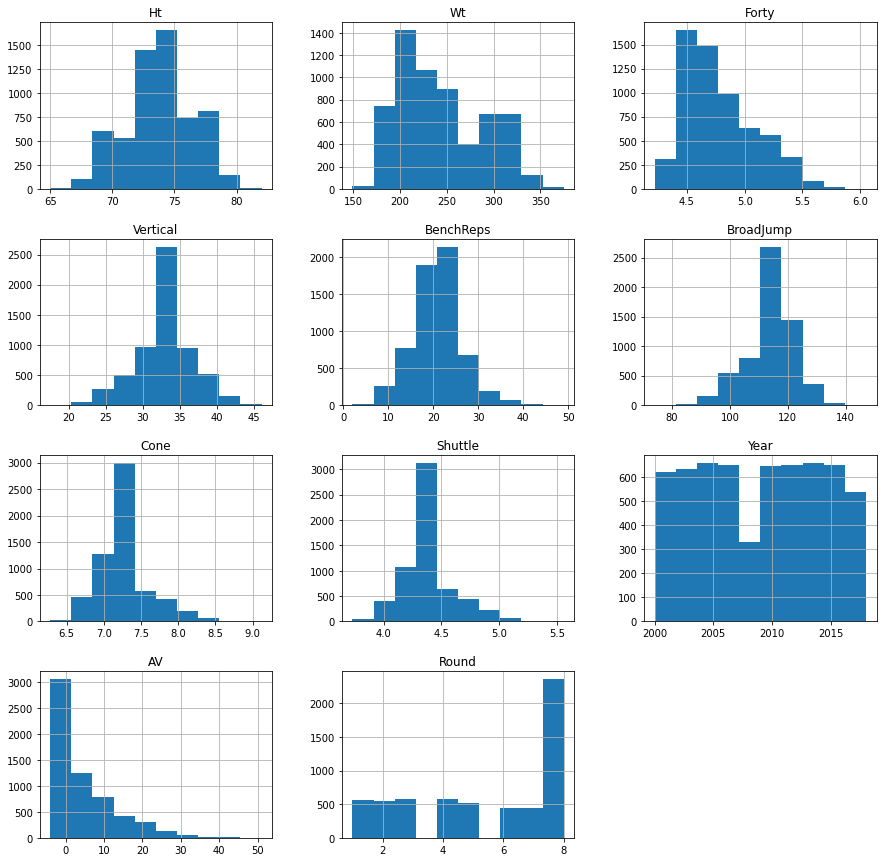

In [158]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df.hist(ax = ax);
#Plot hists on the numeric rows

In [167]:
df.columns

Index(['Pos', 'Ht', 'Wt', 'Forty', 'Vertical', 'BenchReps', 'BroadJump',
       'Cone', 'Shuttle', 'Year', 'AV', 'Round'],
      dtype='object')

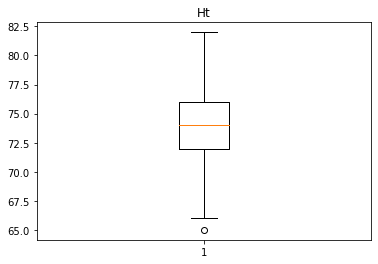

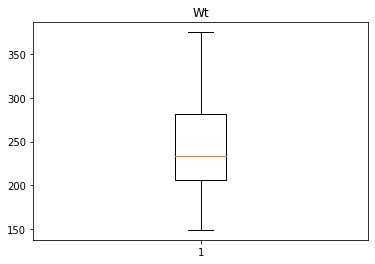

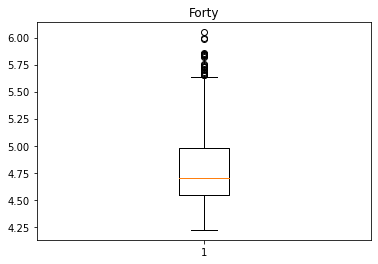

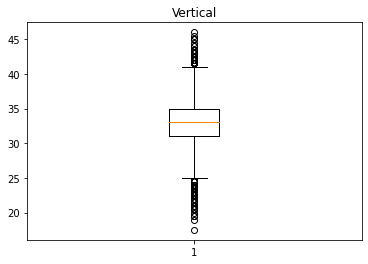

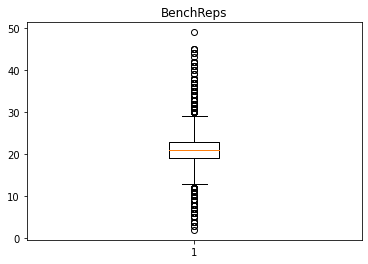

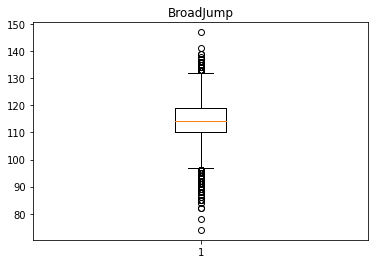

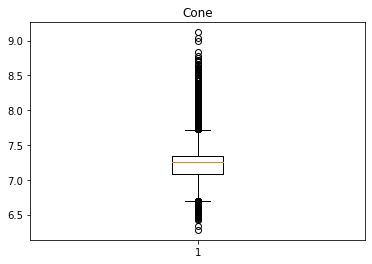

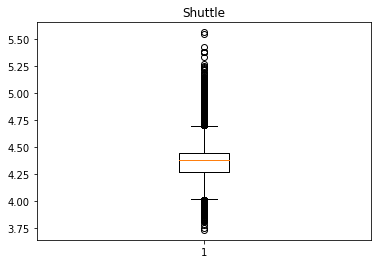

In [173]:
#boxPlots On numeric columns besides year av or round
plt.boxplot(df['Ht']);
plt.title('Ht')
plt.show()
plt.boxplot(df['Wt']);
plt.title('Wt')
plt.show()
plt.boxplot(df['Forty']);
plt.title('Forty')
plt.show()
plt.boxplot(df['Vertical']);
plt.title('Vertical')
plt.show()
plt.boxplot(df['BenchReps']);
plt.title('BenchReps')
plt.show()
plt.boxplot(df['BroadJump']);
plt.title('BroadJump')
plt.show()
plt.boxplot(df['Cone']);
plt.title('Cone')
plt.show()
plt.boxplot(df['Shuttle']);
plt.title('Shuttle')
plt.show()

In [172]:
#There are a few Outliers in 40 yard dash some slower times

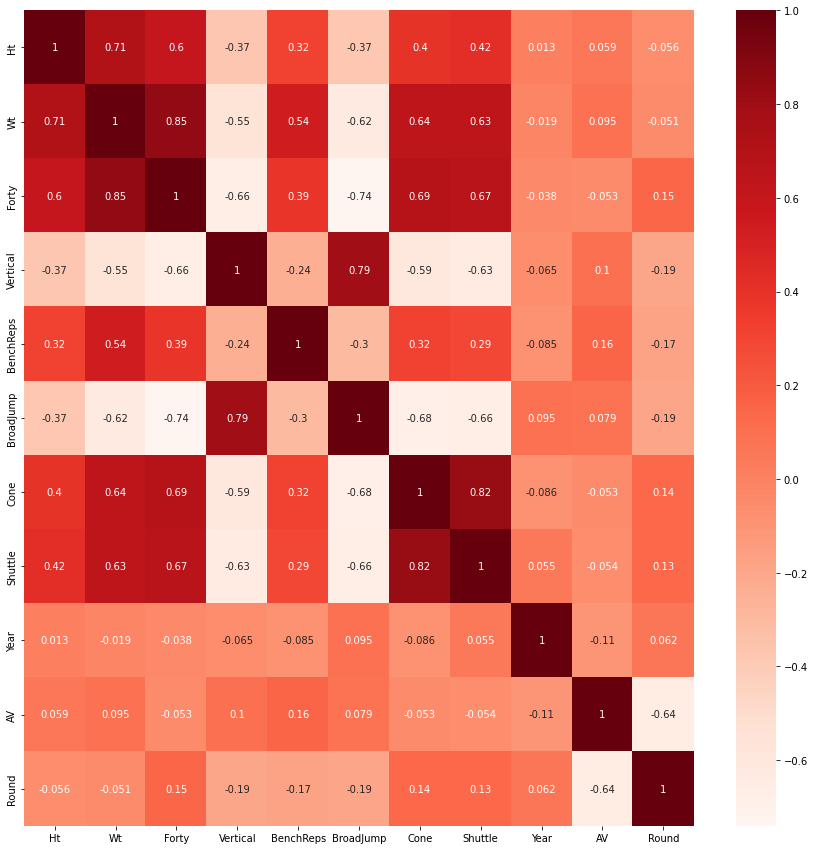

In [177]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
sns.heatmap(df.corr(),cmap='Reds',annot=True, ax=ax)

In [178]:
#Av is negatively correlated to my Target of Round
#Forty Postively COrrelated to ht and wt
#Cone and Shuttle Postively Correlated to Eachtoher and Ht Wt Forty